> (Última Actualización: 23 de Septiembre de 2025)

# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.

# Motivación de este colab
<!-- $$\require{amsmath}$$ -->

Recordemos que estamos estudiando **sistemas dinámicos**, con reglas representadas por **ecuaciones diferenciales ordinarias (ODEs)**. En el caso 2D, vamos a tener conjuntos de pares de ecuaciones que describen la evolución temporal de dos variables.

Podemos ver directamente como encontrar **soluciones al problema de valor inicial en 2D** usando métodos de **integración numérica** 2D, que van a ser trayectorias en el diagrama de fases. Además vimos que podemos entender mejor el sistema mediante la aplicación de diversas **herramientas gráficas**. Esto nos permitió estudiar distintos tipos de puntos fijos de acuerdo a como condicionan el flujo en el espacio de fases.

En este Colab, vamos a aplicar las herramientas aprendidas para el estudio del flujo bidimensional, pero en este caso para incorporar nuevos elementos dinámicos relevantes, los cuales no podían aparecer para sistemas unidimensionales. Se trata de los **ciclos límite**.

$$
x(t_0+\tau) = x(t_0) \neq x(t), \forall t
$$

---
# Ciclos límite

Definimos como ciclo límite a una órbita periódica aislada.

<center>
<img src="https://lh4.googleusercontent.com/proxy/6-fL6oliiEmpNnrSdFa-LeWroIvfU2Krb1kBFhLJSIWSHyzxEREfd3vSlRl8dMmoPoVuARg0gq_Q3vvdKM8ZbYuj863JixheDuYMtzdJEg" width="500"/>
</center>



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

---
## Ejercicio 1

Sea el sistema descrito por el siguiente conjunto de ecuaciones

$$
\dot{x} = y\\
\dot{y} = -x
$$

Encuentre la solución para condiciones iniciales [1, 0]. Es periódica? Si así lo pareciera, busque el período de la solución. Para esto se propone encontrar los picos de la señal con `scipy.signal.find_peaks`, encontrar la distancia entre esos picos con `numpy.diff`, y ver si la solución muestra una periodicidad definida. Puedo decir que se trata de un ciclo límite? Justifique usando las herramientas vistas.



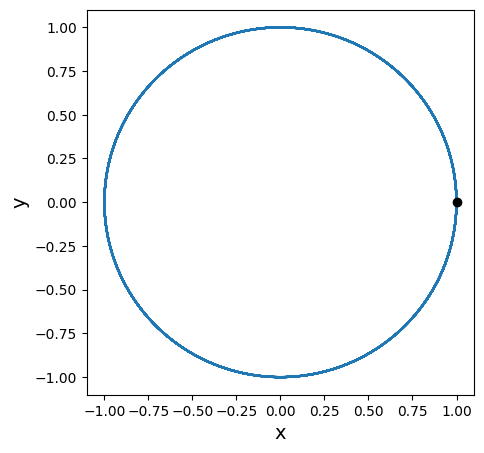

In [ ]:
# # # COMPLETAR
def campo_vector(t,z):
  x = z[0]
  y = z[1]

  dxdt = y
  dydt = -x

  return [dxdt, dydt]


dt = 0.001
tmax = 100
t = np.arange(0, tmax, dt)
xi = 1
yi = 0
ti = t[0]
zi = [xi, yi]
sol = sp.integrate.solve_ivp(campo_vector, [t[0], t[-1]], zi, t_eval=t, method='RK45')

plt.figure(figsize=(5,5))
plt.plot(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

[ 6280 12564 18843 25127 31406 37689 43968 50252 56531 62814 69093 75377
 81656 87939 94219]
[ 6.28  12.564 18.843 25.127 31.406 37.689 43.968 50.252 56.531 62.814
 69.093 75.377 81.656 87.939 94.219]
[6.284 6.279 6.284 6.279 6.283 6.279 6.284 6.279 6.283 6.279 6.284 6.279
 6.283 6.28 ]


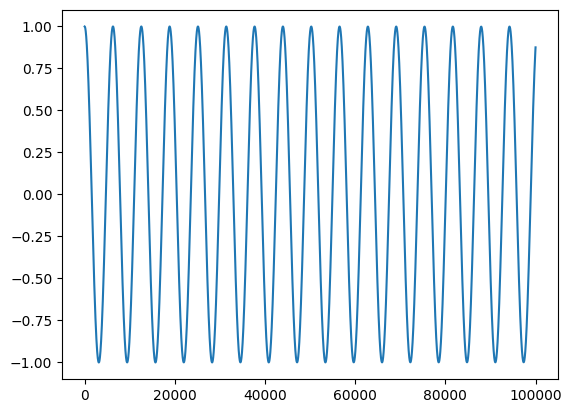

In [ ]:
graf = sol.y[0, :]

plt.plot(graf)

peaks = sp.signal.find_peaks(graf,height = 0.5)[0]
print(peaks)

peaks_values = t[peaks]
print(peaks_values)

dif = np.diff(peaks_values)
print(dif)

#La solucion muestra una periodiciad definida.
#No es un ciclo limite, pues hay orbitas periodicas no aisladas.

---
## Ejercicio 2

Sea el sistema descrito por el siguiente conjunto de ecuaciones

$$
\dot{x} = y(1+\epsilon x)\\
\dot{y} = -x(1+\epsilon x)
$$

2.1. Para alguna condición inicial particular, integre las ecuaciones.

2.2. Estime el período.

2.3. Ahora vuelva a integrar definiendo como tiempo de integración un único período completo. Considere usar un paso grande, para tener un muestreo bastante discreto de las soluciones y grafique los puntos de la solución en lugar de líneas sólidas. Compare con las soluciones del ejercicio anterior. Qué encuentra de diferente?

2.4. Transforme las soluciones encontradas a coordenadas polares usando:

$$
\rho = \sqrt{x^2+y^2}\\
\phi = arctan \left(\frac{y}{x} \right)
$$

Qué puede decir del problema y de su comparación con el ejercicio anterior desde esta perspectiva?


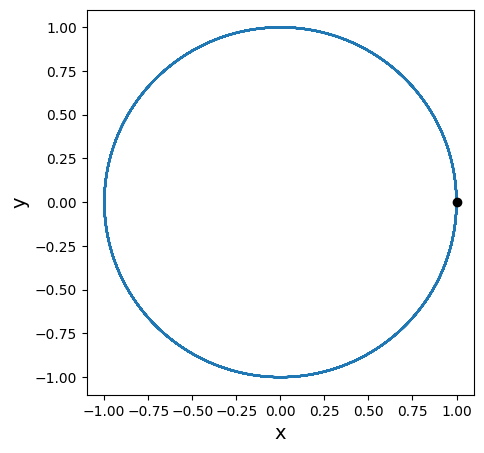

In [ ]:
# # # COMPLETAR

def campo_vector2 (t,z,eps):
  x = z[0]
  y = z[1]

  dxdt = y*(1+eps*x)
  dydt = -x*(1+eps*x)

  return [dxdt, dydt]

eps = 0.1 # Define a value for epsilon
dt = 0.001
tmax = 100
t = np.arange(0, tmax, dt)
xi = 1
yi = 0
ti = t[0]
zi = [xi, yi]
sol = sp.integrate.solve_ivp(campo_vector2, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(eps,)) # Pass epsilon using args

plt.figure(figsize=(5,5))
plt.plot(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

[ 6314 12627 18941 25254 31568 37881 44195 50508 56822 63135 69450 75762
 82076 88389 94702]
[ 6.314 12.627 18.941 25.254 31.568 37.881 44.195 50.508 56.822 63.135
 69.45  75.762 82.076 88.389 94.702]
[6.313 6.314 6.313 6.314 6.313 6.314 6.313 6.314 6.313 6.315 6.312 6.314
 6.313 6.313]
6.313428571428572


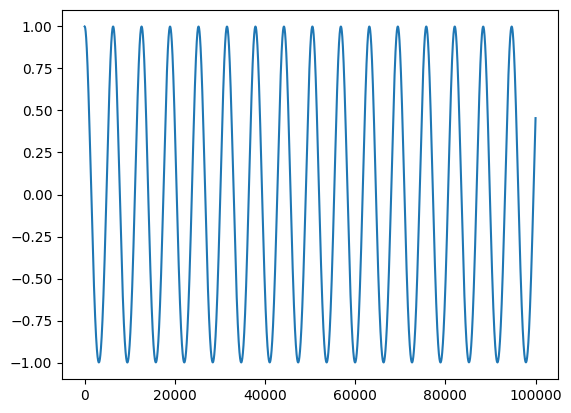

In [ ]:
graf = sol.y[0, :]

plt.plot(graf)

peaks = sp.signal.find_peaks(graf, height = 0.5)[0]
print(peaks)

peaks_values = t[peaks]
print(peaks_values)

dif = np.diff(peaks_values)
print(dif)

periodo = np.mean(dif)
print(periodo)


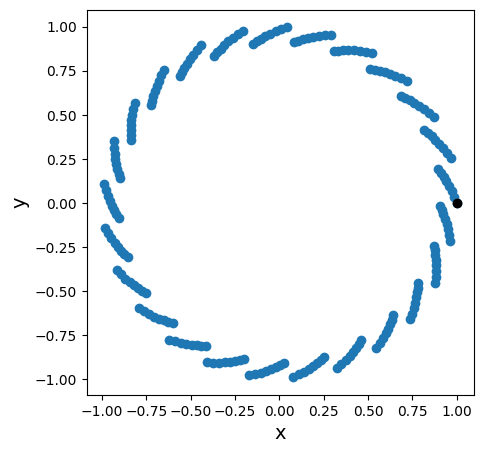

In [ ]:
eps = 0.01 # Define a value for epsilon
dt = 50
tmax = 10000
t = np.arange(0, tmax, dt)
xi = 1
yi = 0
ti = t[0]
zi = [xi, yi]
sol = sp.integrate.solve_ivp(campo_vector2, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(eps,)) # Pass epsilon using args

plt.figure(figsize=(5,5))
plt.scatter(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

#Ahora si parece haber un ciclo limite..

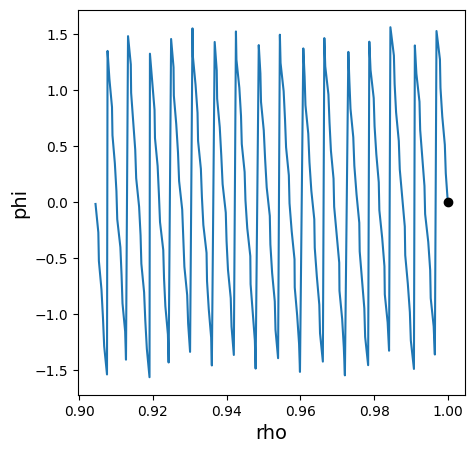

In [ ]:
def polares (x,y):
  rho = np.sqrt(x**2+y**2)
  phi = np.arctan(y/x)
  return rho, phi

rho, phi = polares(sol.y[0, :], sol.y[1, :])

plt.figure(figsize=(5,5))
plt.plot(rho, phi)
plt.plot(rho[0], phi[0], 'ko')
plt.xlabel('rho', fontsize=14)
plt.ylabel('phi', fontsize=14)
plt.show()

#Se observa que rho disminuye, mientras se matiene una órbita.

---
## Ejercicio 3

La ecuación del [oscilador de Van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) está dada por

$$
\ddot{x} - \mu(1 - x^2)\dot{x} + x = 0
$$

3.1. Escriba una función llamada `van_der_pol` para esta ecuación expresada como un sistema dinámico.

3.2. Integre con `solve_ivp` para $\mu=2$ con condiciones iniciales $x=1$ y $\dot{x}=0$, dandole suficiente tiempo a la solución según considere.

3.3. Grafique el diagrama de fases ($x$, $\dot{x}$) de la solución con puntos en lugar de con líneas sólidas (incluya el punto de la condición inicial de manera distintiva). Qué puede observar en referencia a la distancia entre puntos? A qué se lo atribuye?


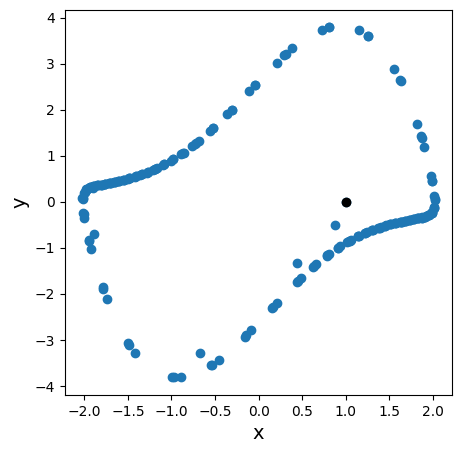

In [ ]:
# # # COMPLETAR

def van_der_pol (t,z,mu):
  x = z[0]
  y = z[1]

  dxdt = y
  dydt = mu*(1-x**2)*y-x

  return [dxdt, dydt]

mu = 2
dt = 0.5
tmax = 100
t = np.arange(0, tmax, dt)
xi = 1
yi = 0
ti = t[0]
zi = [xi, yi]
sol = sp.integrate.solve_ivp(van_der_pol, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(mu,)) # Pass epsilon using args

plt.figure(figsize=(5,5))
plt.scatter(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

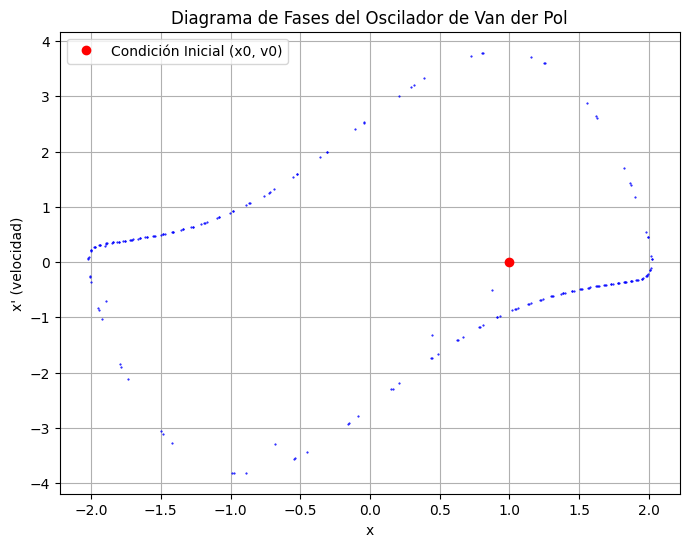

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(sol.y[0], sol.y[1], 'b.', markersize=1)  # Diagrama de fases con puntos
plt.plot(sol.y[0][0], sol.y[1][0], 'ro', label='Condición Inicial (x0, v0)')  # Punto inicial en rojo
plt.xlabel('x')
plt.ylabel('x\' (velocidad)')
plt.title('Diagrama de Fases del Oscilador de Van der Pol')
plt.legend()
plt.grid(True)
plt.show()

---
## Ejercicio 4

Sea el siguiente sistema visto en clase

$$
\dot{\rho} = \rho(1-\rho)\\
\dot{\phi} = \omega + sin(\phi)
$$

4.1. Integre el sistema para w=1 usando distintas condiciones iniciales con $\rho$ entre 0 y 2, y $\phi_{inicial}=0$. Vea la evolución temporal de $\rho$.

4.2. Integre el sistema para w igual a -1, 0, y 1 usando como condiciones iniciales $\rho_{inicial}=1$ y $\phi_{inicial}=0$. Vea la evolución temporal de $\phi$. Cómo interpreta lo que está pasando?

4.3. Integre el sistema para w=1, usando como condiciones iniciales $\rho_{inicial}=1$ y $\phi_{inicial}=0$. Haga la transformación a coordenadas cartesianas usando las expresiones

$$
x = \rho.cos(\phi)\\
y = \rho.sin(\phi)
$$

Grafique en el diagrama de fases ($x$, $y$), pero usando puntos en lugar de una línea sólida. Qué observa? Estudie el flujo del campo vector para entender mejor lo que está pasando.

Para eso, genere una grilla en ($x$,$y$). Transformela a coordenadas polares usando la expresión

$$
\rho = \sqrt{x^2+y^2}\\
\phi = arctan \left(\frac{y}{x} \right)
$$

Calcule los valores del campo vector sin integrar en coordenadas polares y transforme esas velocidades a coordenadas cartesianas

$$
\dot{x} = \dot{\rho} \cos(\phi) - \rho \dot{\phi} \sin(\phi)\\
\dot{y} = \dot{\rho} \sin(\phi) + \rho \dot{\phi} \cos(\phi)
$$

Grafique usando `quiver`.


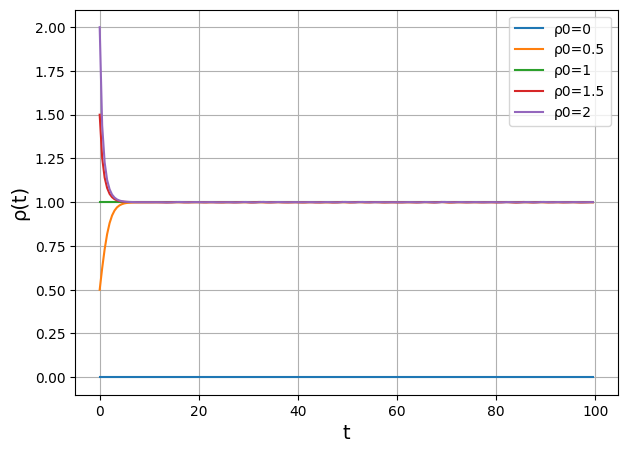

In [ ]:
# # # COMPLETAR

#4.1
def campo_vector3 (t, z, w):
    rho = z[0]
    phi = z[1]

    drhodt = rho * (1 - rho)
    dphidt = w + np.sin(phi)

    return [drhodt, dphidt]

w = 1
dt = 0.5
tmax = 100
t = np.arange(0, tmax, dt)
rhos = [0, 0.5, 1, 1.5, 2]
phi = 0

plt.figure(figsize=(7,5))

for rho in rhos:
    zi = [rho, phi]
    sol = sp.integrate.solve_ivp(campo_vector3, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(w,))
    plt.plot(sol.t, sol.y[0, :], label=f"ρ0={rho}")

plt.xlabel('t', fontsize=14)
plt.ylabel('ρ(t)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


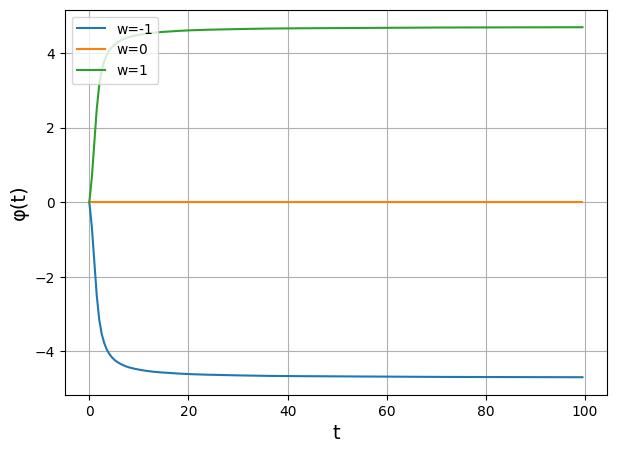

In [ ]:
#4.2

ws = [-1,0,1]
dt = 0.5
tmax = 100
t = np.arange(0, tmax, dt)
rho = 1
phi = 0

plt.figure(figsize=(7,5))

for w in ws:
    zi = [rho, phi]
    sol = sp.integrate.solve_ivp(campo_vector3, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(w,))
    plt.plot(sol.t, sol.y[1, :], label=f"w={w}")

plt.xlabel('t', fontsize=14)
plt.ylabel('φ(t)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#4.3

w = 1
dt = 0.05
tmax = 100
t = np.arange(0, tmax, dt)
rho = 1
phi = 0



zi = [rho, phi]
sol = sp.integrate.solve_ivp(campo_vector3, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(w,))

def cartesianas(rho, phi):
  x = rho*np.cos(phi)
  y = rho*np.sin(phi)
  return x, y

x, y = cartesianas(sol.y[0, :], sol.y[1, :])

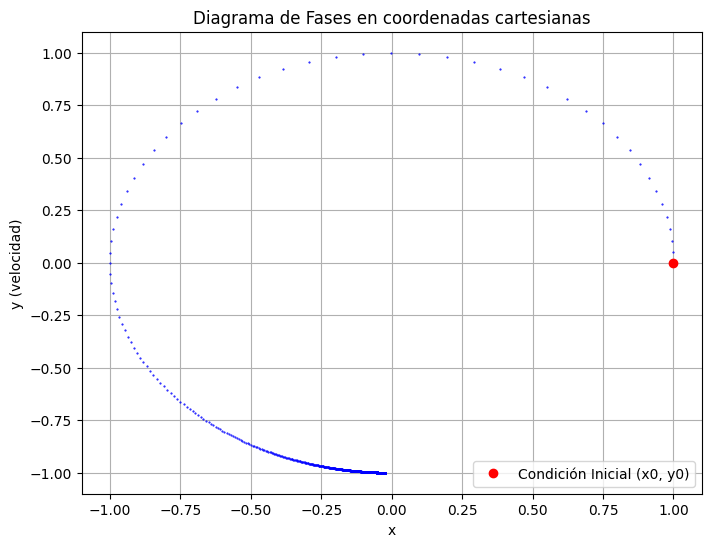

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b.', markersize=1)  # Diagrama de fases con puntos
plt.plot(x[0], y[0], 'ro', label='Condición Inicial (x0, y0)')  # Punto inicial en rojo
plt.xlabel('x')
plt.ylabel('y (velocidad)')
plt.title('Diagrama de Fases en coordenadas cartesianas')
plt.legend()
plt.grid(True)
plt.show()

#Se observa como se acercan los puntos al (-1, 0) con una trayectoria espiralada, como si hubiera un punto fijo atractor.

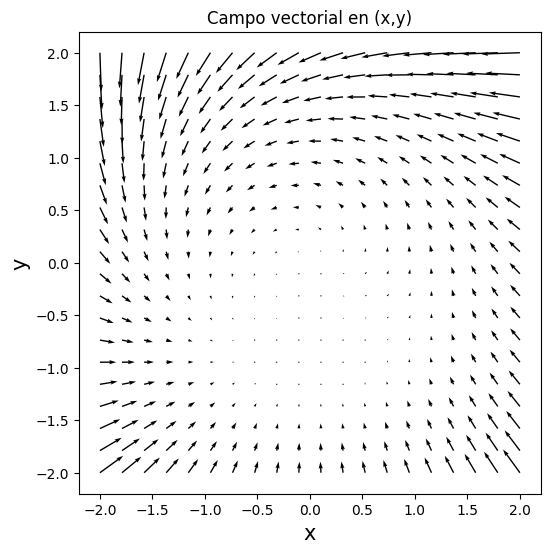

In [ ]:
def cartesianas_prima(rho, phi, rho_prima, phi_prima):
    dxdt = rho_prima * np.cos(phi) - rho * phi_prima * np.sin(phi)
    dydt = rho_prima * np.sin(phi) + rho * phi_prima * np.cos(phi)
    return dxdt, dydt

# grilla cartesiana
XX, YY = np.meshgrid(np.linspace(-2., 2., 20), np.linspace(-2., 2., 20))  # menos puntos para que se vea bien

# paso a polares
RHO = np.sqrt(XX**2 + YY**2)
PHI = np.arctan2(YY, XX)

# dinámicas en polares
drho = RHO * (1 - RHO)
dphi = w + np.sin(PHI)

# paso a cartesianas
dx, dy = cartesianas_prima(RHO, PHI, drho, dphi)

# ploteo campo vectorial
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Campo vectorial en (x,y)")
ax.quiver(XX, YY, dx, dy, color='k', angles='xy')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_aspect('equal')
plt.show()

#Se observa mejor como actua el flujo, induciendo ese espiral que se ve en el grafico anterior.


---
## Ejercicio 5

Sea el sistema para la bifurcación de Hopf

$$
\dot{x} = \mu x + y\\
\dot{y} = -x + \mu y - x^2 y
$$

5.1. Integre el sistema con `solve_ivp` hasta un tiempo de 10, con paso temporal $dt=0.1$, condiciones iniciales $x=0$ y $y=0$, para para valores de $\mu=[-1, -0.5, 0, 0.5, 1]$. Calcule el radio como $r=\sqrt{x^2+y^2}$ y muestre las soluciones de $r$ para los distintos $\mu$ en un mismo gráfico. Qué muestran las observaciones sobre la evolución temporal en este punto?

5.2. Pruebe ahora de hacer lo mismo pero con condiciones iniciales $x=0.1$ y $y=0.1$ (puede demorar un minuto). Qué observa en relación al item anterior?

5.3. Estudie la bifurcación de este sistema. Cómo son las oscilaciones que se "prenden"?


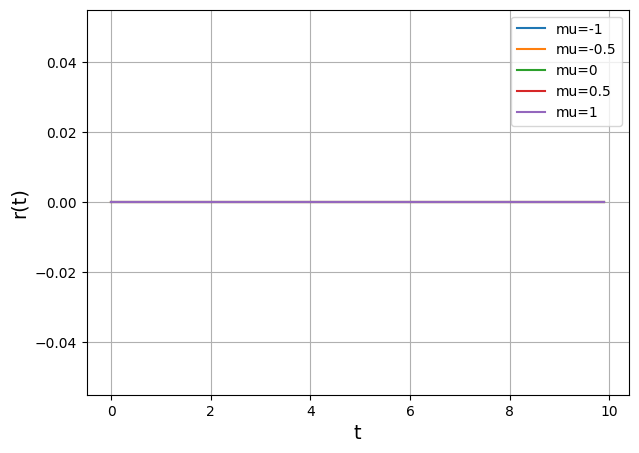

In [ ]:
# # # COMPLETAR

#4.1

def campo_vector4 (t, z, mu):
    x = z[0]
    y = z[1]

    dxdt = mu * x + y
    dydt = -x + mu * y - x**2 * y

    return [dxdt, dydt]


mus = [-1,-0.5, 0, 0.5, 1]
dt = 0.1
tmax = 10
t = np.arange(0, tmax, dt)
xi = 0
yi = 0
zi = [xi, yi]

sols = []
r = []
plt.figure(figsize=(7,5))

for mu in mus:
    sol = sp.integrate.solve_ivp(campo_vector4, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(mu,))
    sols.append(sol)
    ri = np.sqrt(sol.y[0, :]**2 + sol.y[1, :]**2)
    r.append(ri)
    plt.plot(sol.t, ri, label=f"mu={mu}")

plt.xlabel('t', fontsize=14)
plt.ylabel('r(t)', fontsize=14)
plt.legend()
plt.grid(True)


#Muestran que r se mantiene en 0, pues (x,y) = 0 es un punto fijo para todo mu.

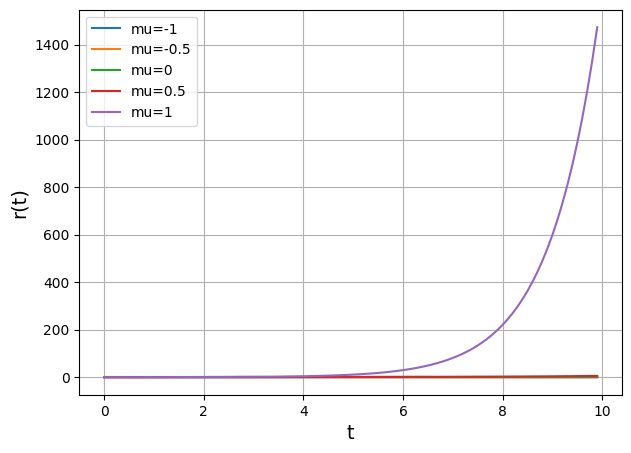

In [ ]:
#4.2


mus = [-1,-0.5, 0, 0.5, 1]
dt = 0.1
tmax = 10
t = np.arange(0, tmax, dt)
xi = 0.1
yi = 0.1
zi = [xi, yi]

sols = []
r = []
plt.figure(figsize=(7,5))

for mu in mus:
    sol = sp.integrate.solve_ivp(campo_vector4, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(mu,))
    sols.append(sol)
    ri = np.sqrt(sol.y[0, :]**2 + sol.y[1, :]**2)
    r.append(ri)
    plt.plot(sol.t, ri, label=f"mu={mu}")

plt.xlabel('t', fontsize=14)
plt.ylabel('r(t)', fontsize=14)
plt.legend()

plt.grid(True)

<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2963859829.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Diagrama de Fases con Diferentes Valores de $\mu$')


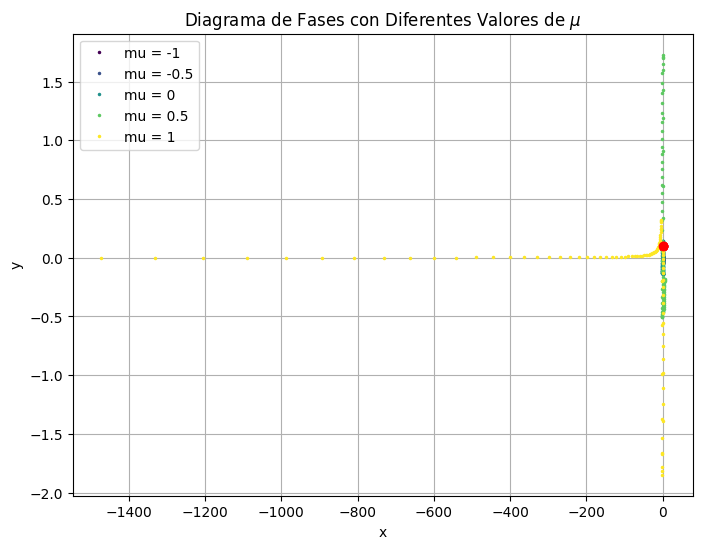

In [ ]:
#4.3

# Parámetros
mus = [-1, -0.5, 0, 0.5, 1]
dt = 0.1
tmax = 10
t = np.arange(0, tmax, dt)
xi = 0.1
yi = 0.1
zi = [xi, yi]

sols = []
r = []

# Elegimos un colormap
cmap = plt.get_cmap('viridis')  # Puedes probar con otros como 'plasma', 'inferno', etc.
norm = plt.Normalize(min(mus), max(mus))  # Normalizamos para que el colormap cubra el rango de 'mus'

plt.figure(figsize=(8,6))

for mu in mus:
    sol = sp.integrate.solve_ivp(campo_vector4, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(mu,))
    sols.append(sol)

    # Asignamos un color basado en mu
    color = cmap(norm(mu))  # Obtiene un color del colormap basado en mu

    # Diagrama de fases con puntos
    plt.plot(sol.y[0], sol.y[1], '.', markersize=3, color=color, label=f'mu = {mu}')  # Usamos 'color' para cada mu
    plt.plot(sol.y[0][0], sol.y[1][0], 'ro')  # Punto inicial en rojo

# Títulos y etiquetas
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diagrama de Fases con Diferentes Valores de $\mu$')
plt.legend()
plt.grid(True)
plt.show()


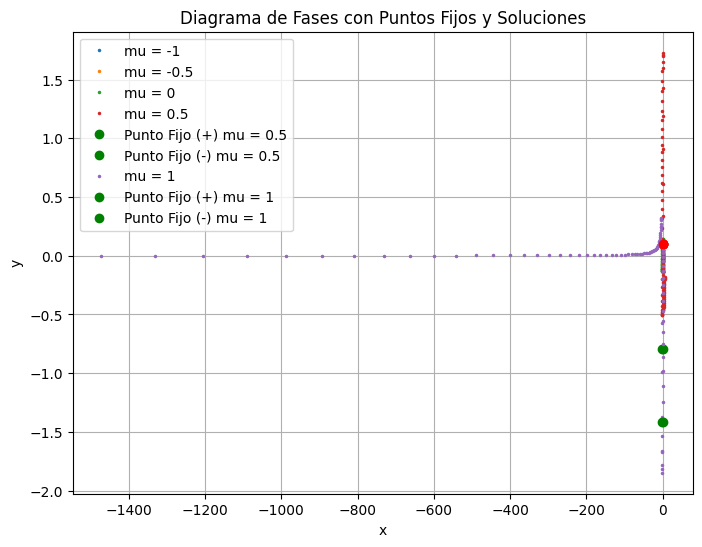

In [ ]:
mus = [-1, -0.5, 0, 0.5, 1]
dt = 0.1
tmax = 10
t = np.arange(0, tmax, dt)
xi = 0.1
yi = 0.1
zi = [xi, yi]

sols = []
r = []

plt.figure(figsize=(8,6))

# Calcular y graficar los puntos fijos
for mu in mus:
    sol = sp.integrate.solve_ivp(campo_vector4, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(mu,))
    sols.append(sol)

    # Diagrama de fases con los puntos de la solución
    plt.plot(sol.y[0], sol.y[1], '.', markersize=3, label=f'mu = {mu}')
    plt.plot(sol.y[0][0], sol.y[1][0], 'ro')  # Punto inicial en rojo

    # Puntos fijos
    if mu > 0:
        # Puntos fijos: x = ±√((1 + μ²) / μ)
        fixed_point_x = np.sqrt((1 + mu**2) / mu)
        fixed_point_y = -mu * fixed_point_x

        # Graficar los puntos fijos
        plt.plot(fixed_point_x, fixed_point_y, 'go', markersize=6, label=f'Punto Fijo (+) mu = {mu}')
        plt.plot(-fixed_point_x, fixed_point_y, 'go', markersize=6, label=f'Punto Fijo (-) mu = {mu}')

# Títulos y etiquetas
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diagrama de Fases con Puntos Fijos y Soluciones')
plt.legend()
plt.grid(True)
plt.show()